**Dicoding ML Terapan Proyek 1** oleh Roissyah Fernanda Khoiroh

In [1]:
from google.colab import drive # mount gdrive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# **Data Understanding**

In [4]:
# read the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Dicoding Projects/CS1: Predictive Analysis/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> **tidak ada nilai kosong pada dataset**

In [6]:
df.duplicated().sum()

1

In [7]:
# drop duplicate value
df = df.drop_duplicates()
df.duplicated().sum()

0

# **Exploratory Data Analysis**

### **Bagaimana dengan distribusi umur pasien?**

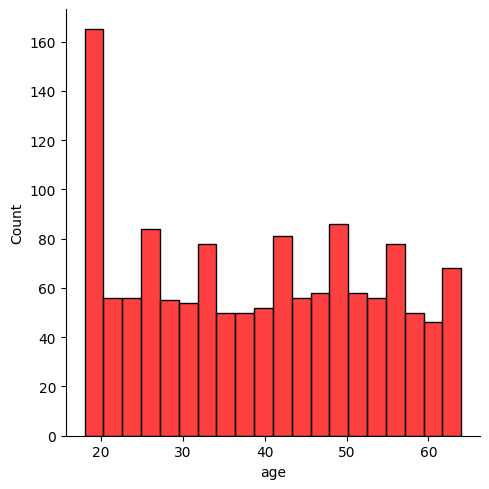

In [ ]:
sns.displot(df['age'], kind='hist', bins=20, color='red')

### **Adakah perbedaan biaya pengobatan antara pasien berusia <= 20 tahun dengan pasien berusia > 20 tahun?**

<ipython-input-13-37b533cb9b46>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.age <= 20)]['charges'], color = 'g', ax=ax)
<ipython-input-13-37b533cb9b46>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.age > 20)]['charges'],color='r',ax=ax)


Text(0.5, 1.0, 'Distribution of charges for patients with age greater than 20')

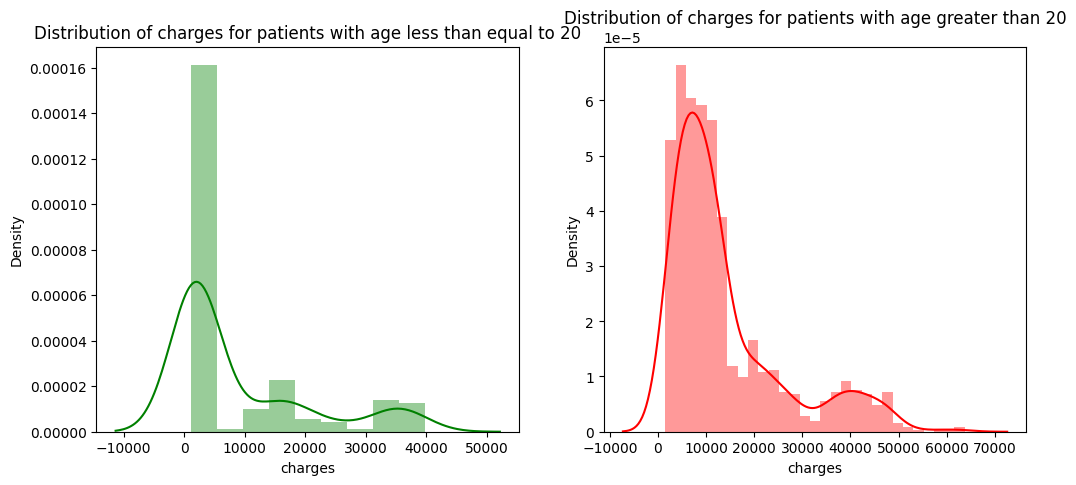

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.age <= 20)]['charges'], color = 'g', ax=ax)
ax.set_title('Distribution of charges for patients with age less than equal to 20')

ax=f.add_subplot(122)
sns.distplot(df[(df.age > 20)]['charges'],color='r',ax=ax)
ax.set_title('Distribution of charges for patients with age greater than 20')

### **Bagaimana proporsi antara pasien lelaki dan perempuan?**

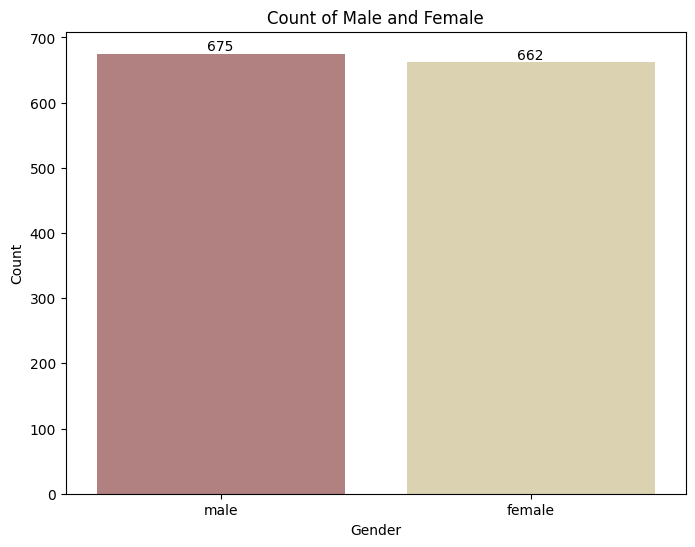

In [ ]:
gender_counts = df['sex'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pink")
plt.title('Count of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding labels to the bars
for i, count in enumerate(gender_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

### **Bagaimana dengan jumlah perokok dan non-perokok berdasarkan jenis kelamin?**

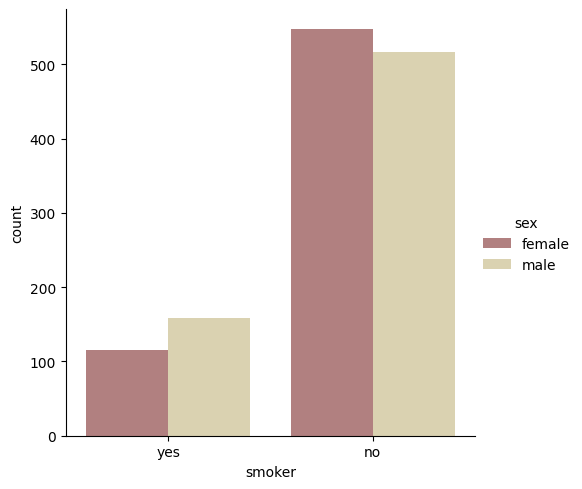

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

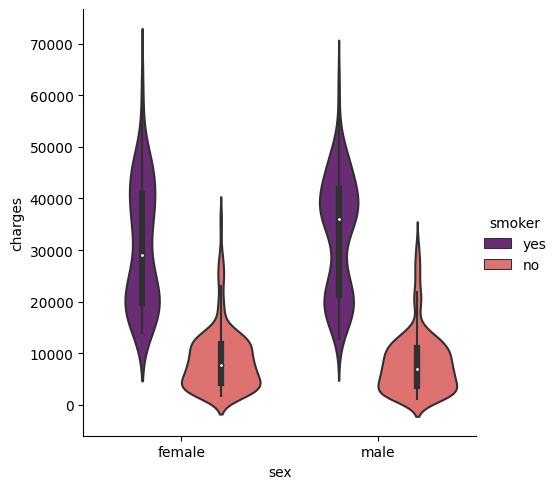

In [ ]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')

### **Bagaimana dengan distribusi BMI?**

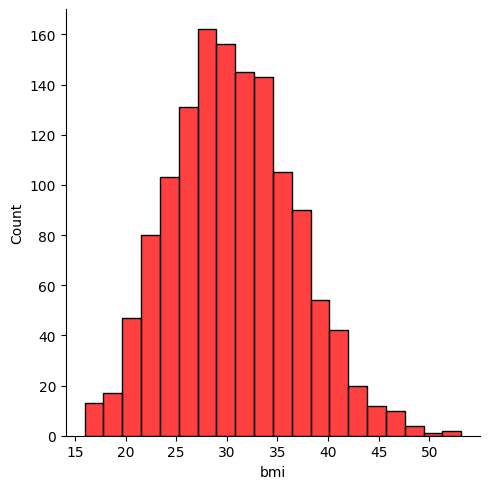

In [ ]:
sns.displot(df['bmi'], kind='hist', bins=20, color='red')

### **Adakah perbedaan tagihan antara pasien dengan BMI di atas dan di bawah 30?**

<ipython-input-15-ec1085e4c9a5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi < 30)]['charges'], color = 'g', ax=ax)
<ipython-input-15-ec1085e4c9a5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi >= 30)]['charges'], color='r', ax=ax)


Text(0.5, 1.0, 'Distribution of charges for patients bmi greater than equal to 30')

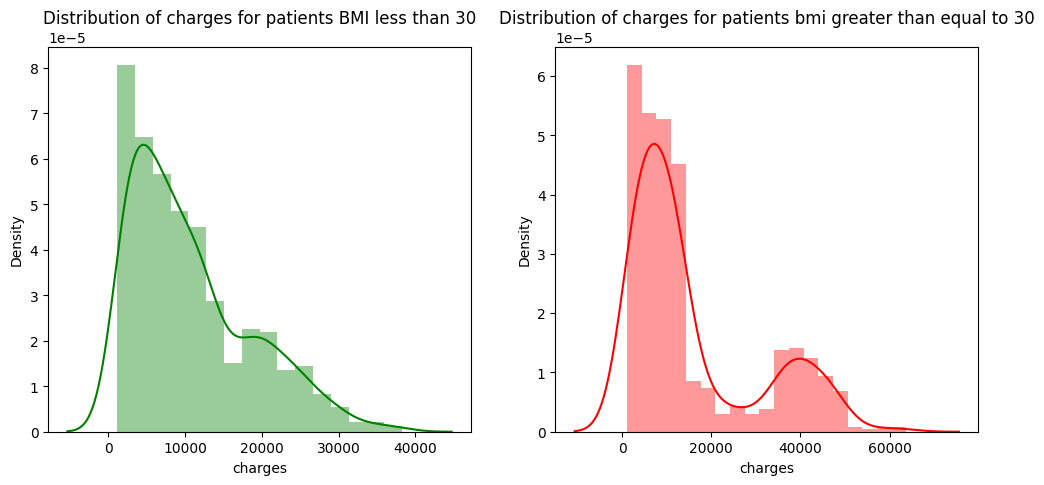

In [15]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.bmi < 30)]['charges'], color = 'g', ax=ax)
ax.set_title('Distribution of charges for patients BMI less than 30')

ax=f.add_subplot(122)
sns.distplot(df[(df.bmi >= 30)]['charges'], color='r', ax=ax)
ax.set_title('Distribution of charges for patients bmi greater than equal to 30')

### **Bagaimana dengan jumlah tanggungan anak yang dimiliki keluarga?**

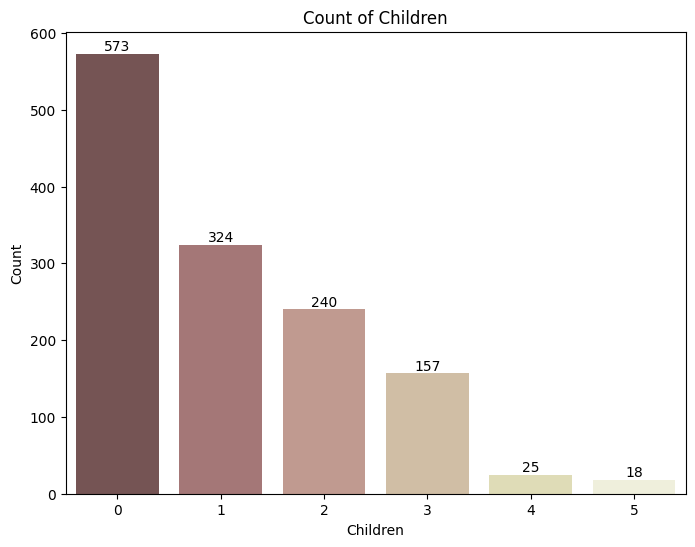

In [ ]:
# count the children
children_counts = df['children'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=children_counts.index, y=children_counts.values, palette="pink")
plt.title('Count of Children')
plt.xlabel('Children')
plt.ylabel('Count')

# Adding labels to the bars
for i, count in enumerate(children_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

### **Bagaimana dengan proporsi antara perokok dan non-perokok?**

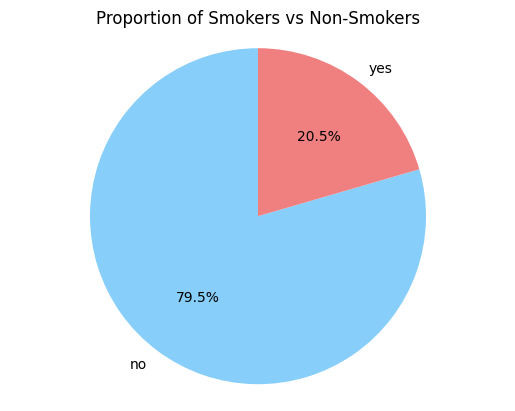

In [ ]:
# Calculate the counts of smokers and non-smokers
smoker_counts = df['smoker'].value_counts()

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'lightcoral'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Proportion of Smokers vs Non-Smokers')

# Display the plot
plt.show()

### **Bagaimana dengan wilayah asal pasien?**

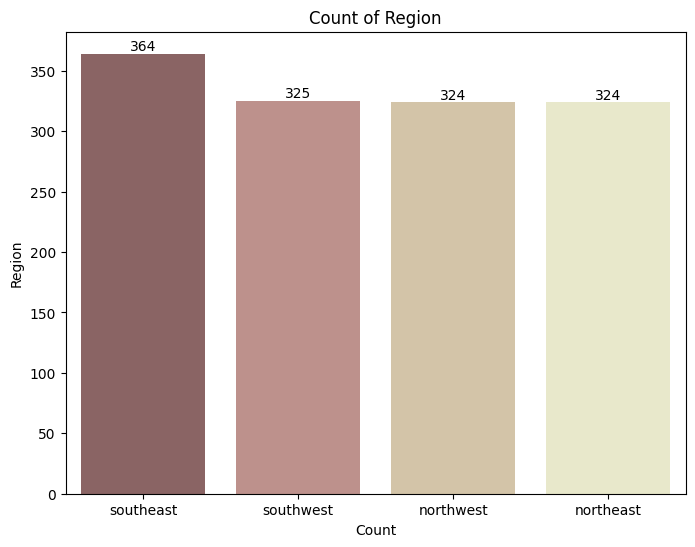

In [ ]:
# region count
region_counts = df['region'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="pink")
plt.title('Count of Region')
plt.ylabel('Region')
plt.xlabel('Count')

# Adding labels to the bars
for i, count in enumerate(region_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

### **Bagaimana dengan sebaran biaya yang harus dikeluarkan pasien?**

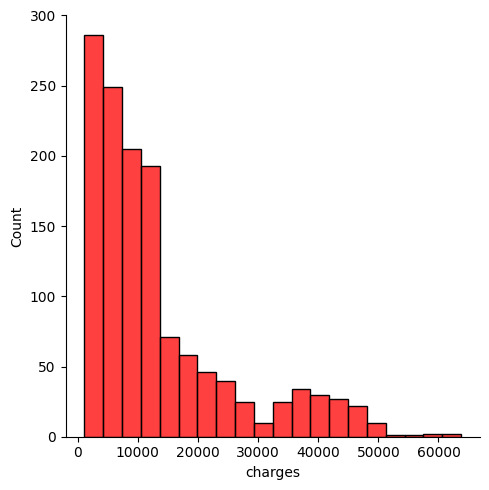

In [ ]:
sns.displot(df['charges'], kind='hist', bins=20, color='red')

<ipython-input-8-982eb70cb645>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], bins=20, color = 'g', ax=ax)
<ipython-input-8-982eb70cb645>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log2(df['charges']), bins=20, color='r', ax=ax)


Text(0.5, 1.0, 'Distribution of charges after log transformation')

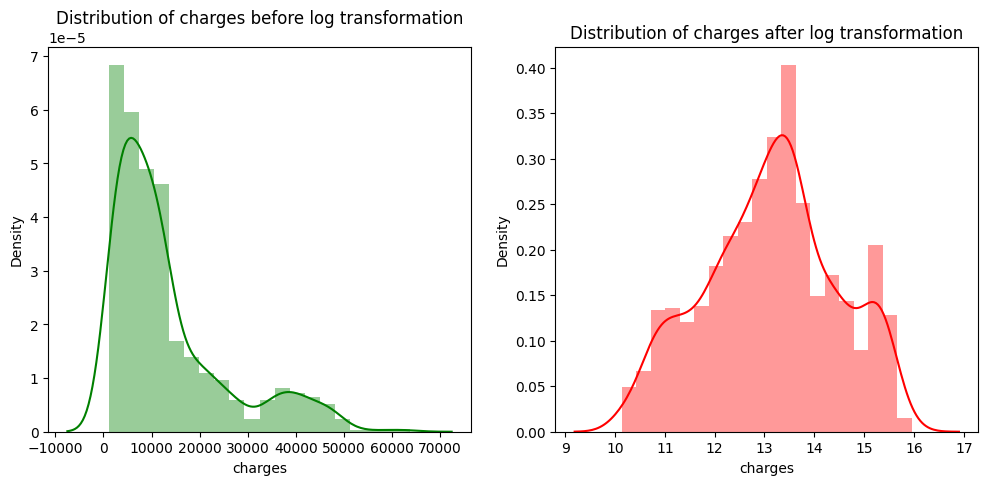

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df['charges'], bins=20, color = 'g', ax=ax)
ax.set_title('Distribution of charges before log transformation')

ax=f.add_subplot(122)
sns.distplot(np.log2(df['charges']), bins=20, color='r', ax=ax)
ax.set_title('Distribution of charges after log transformation')

### **Bagaimana perbedaan tagihan antara perokok dan non-perokok?**

In [ ]:
df['smoker_bool'] = df['smoker'].map(lambda x: 1 if x=='yes' else 0)

/tmp/ipykernel_48/1049446871.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker_bool == 1)]["charges"],color='c',ax=ax)
/tmp/ipykernel_48/1049446871.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker_bool == 0)]['charges'],color='b',ax=ax)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

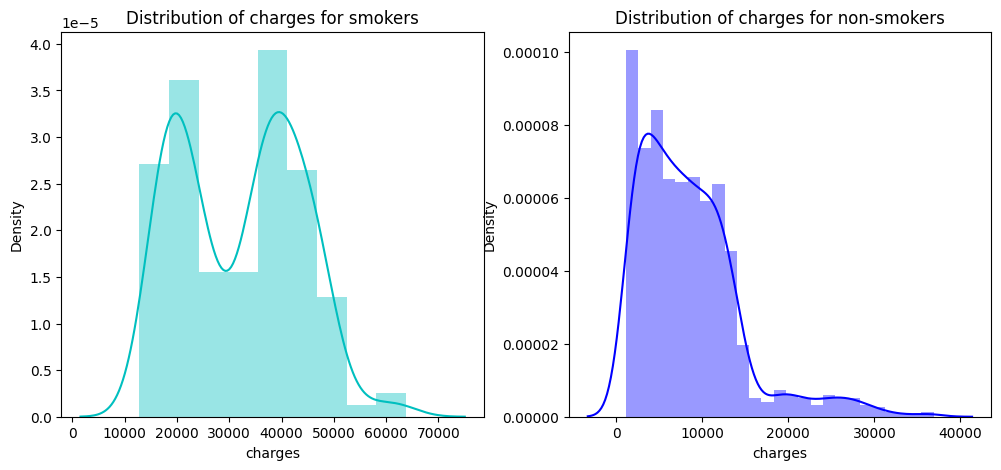

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker_bool == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker_bool == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

### **Adakah perbedaan tagihan antara lelaki dan perempuan dilihat dari variable 'smoker'?**

In [ ]:
df['sex_bool'] = df['sex'].map(lambda x: 1 if x=='male' else 0)

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

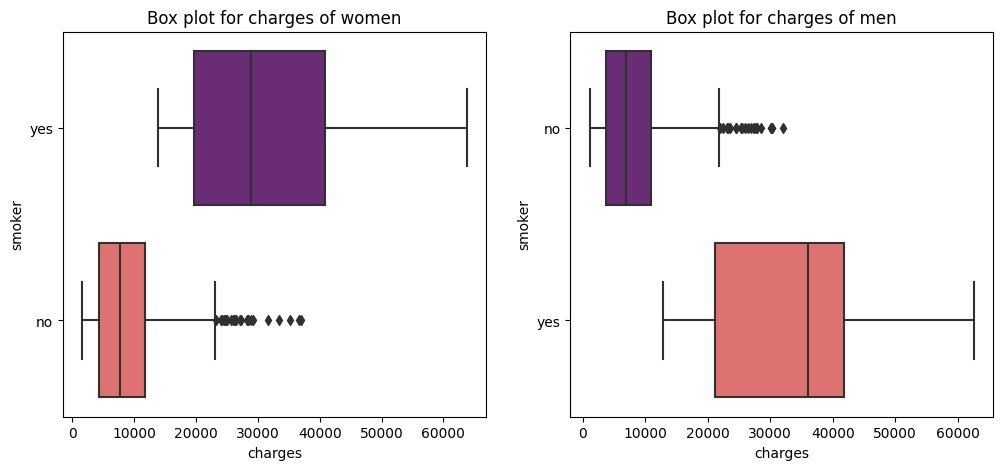

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data = df[(df.sex_bool == 0)] , orient="h", palette = 'magma')

ax=f.add_subplot(122)
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex_bool == 1)] , orient="h", palette = 'magma')

### **Bagaimana hubungan antara charges dan bmi, lalu charges and age?**

Text(0.5, 1.0, 'Scatter plot of charges and age')

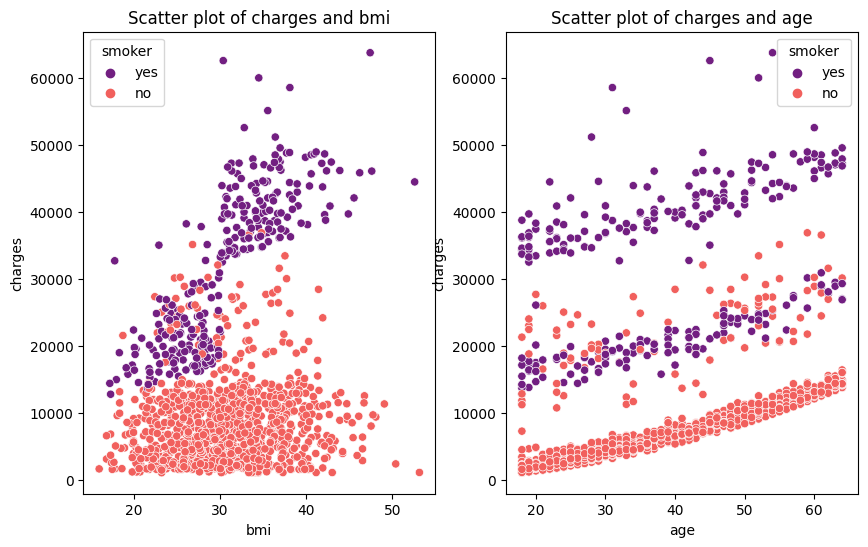

In [ ]:
f = plt.figure(figsize=(10,6))

ax=f.add_subplot(121)
sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
#sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma')
plt.title('Scatter plot of charges and bmi')

ax=f.add_subplot(122)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker')
#sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'magma')
plt.title('Scatter plot of charges and age')

### **Adakah variabel numerikal yang berkorelasi kuat?**

In [ ]:
df = df.drop(columns=['sex_bool', 'smoker_bool'], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


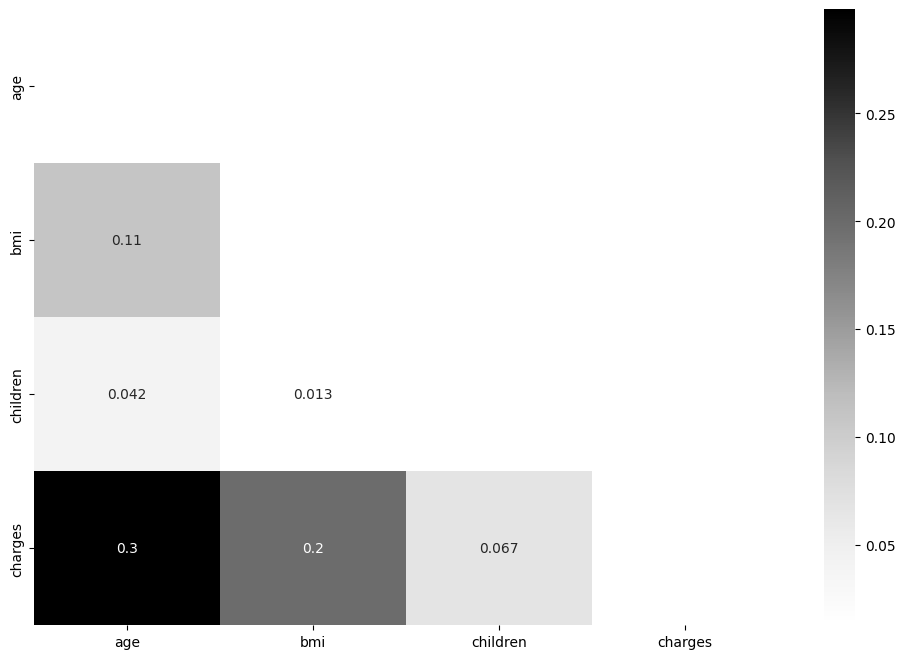

In [ ]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12,8))

#masking the upper triangle part (since matrix is repetitive)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Greys", annot=True)
plt.show()

### **Apakah variabel numerikal memiliki outliers?**

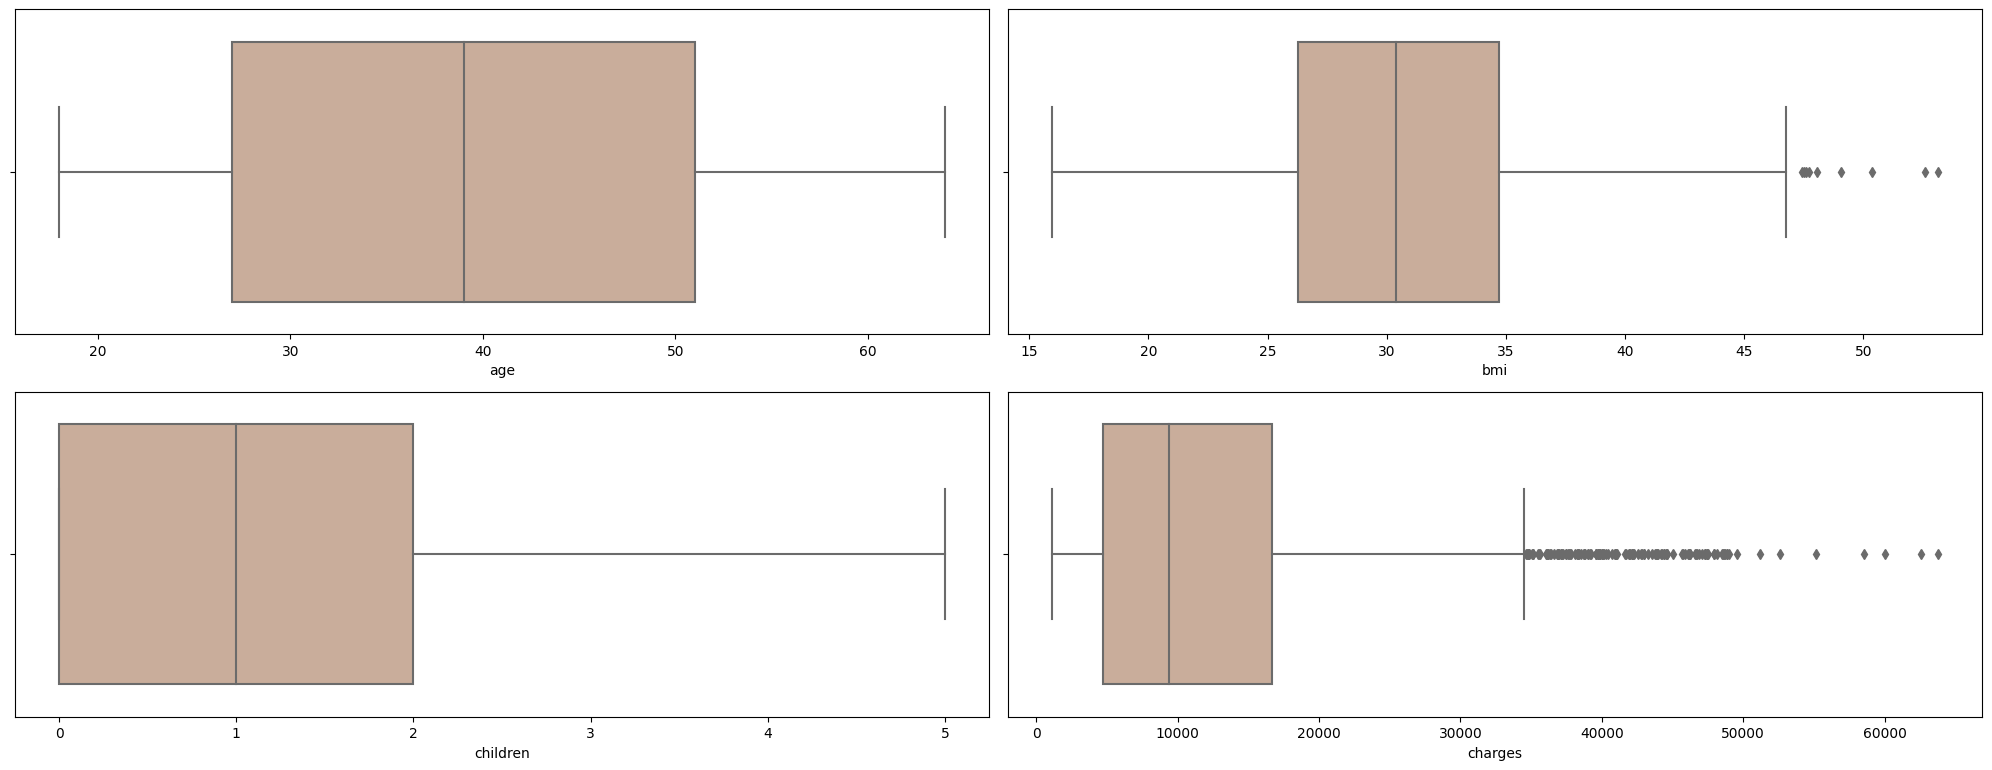

In [ ]:
fig = plt.figure(figsize=(20,15))
for index, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4,2,index+1)
    sns.boxplot(x=col, data=df, orient="h", palette = 'pink')
fig.tight_layout(pad=1.0)

# **Data Preparation**

In [8]:
# encode categorical columns using label encoder
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


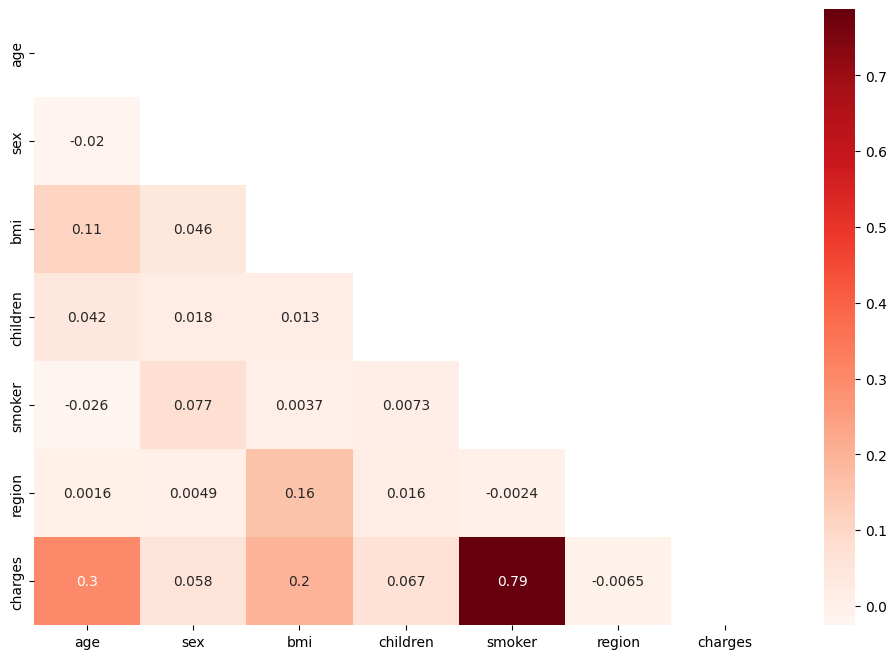

In [ ]:
# corr plot of variables after label encoding

corr_2 = df.corr()
plt.figure(figsize=(12,8))

#masking the upper triangle part (since matrix is repetitive)
mask = np.triu(np.ones_like(corr_2, dtype=bool))
sns.heatmap(corr_2, mask=mask, cmap="Reds", annot=True)
plt.show()

In [10]:
# split X and Y
X = df.drop(columns='charges', axis=1)
y = df['charges']

# log transformation the y
y_log = np.log2(y)

print(X.shape, y.shape, y_log.shape)

(1337, 6) (1337,) (1337,)


In [11]:
# split data into train and test set 75:25 using log transformed y
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.25, random_state=42)

print(f'shape of X_train: {X_train.shape}')
print(f'shape of log transformed y_train: {y_train_log.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of log transformed y_test: {y_test_log.shape}')

shape of X_train: (1002, 6)
shape of log transformed y_train: (1002,)
shape of X_test: (335, 6)
shape of log transformed y_test: (335,)


# **Choosing the best model**

In [ ]:
# baseline 1: GB Regressor

# Create an GBoost regressor
gb_reg = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

# Define RMSE as the evaluation metric
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Make RMSE scorer for cross-validation
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Perform cross-validation with k=5 folds
cv_scores = cross_val_score(gb_reg, X, y_log, cv=5, scoring=rmse_scorer)

# Display the cross-validation results
print("Cross-validation RMSE scores:", -cv_scores)  # Note the negative sign since sklearn uses the convention that higher values are better

# Calculate and display the mean and standard deviation of the cross-validation scores
mean_rmse = -cv_scores.mean()
std_rmse = cv_scores.std()
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")

# Train the XGBoost model on the train set
gb_reg.fit(X_train, y_train_log)

Cross-validation RMSE scores: [0.48983325 0.6824351  0.40784373 0.53011389 0.57913855]
Mean RMSE: 0.5379
Standard Deviation of RMSE: 0.0915


GradientBoostingRegressor(random_state=42)

In [ ]:
# baseline 2: RF Regressor

# Create an RF regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Define RMSE as the evaluation metric
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Make RMSE scorer for cross-validation
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Perform cross-validation with k=5 folds
cv_scores = cross_val_score(rf_reg, X, y_log, cv=5, scoring=rmse_scorer)

# Display the cross-validation results
print("Cross-validation RMSE scores:", -cv_scores)  # Note the negative sign since sklearn uses the convention that higher values are better

# Calculate and display the mean and standard deviation of the cross-validation scores
mean_rmse = -cv_scores.mean()
std_rmse = cv_scores.std()
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")

# Train the RFR model on the train set
rf_reg.fit(X_train, y_train_log)

Cross-validation RMSE scores: [0.52366119 0.71889458 0.47547767 0.56032665 0.59691806]
Mean RMSE: 0.5751
Standard Deviation of RMSE: 0.0824


RandomForestRegressor(random_state=42)

In [ ]:
# baseline 3: Lnear Regression

# Create an Linear regressor
lr_reg = LinearRegression()

# Define RMSE as the evaluation metric
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Make RMSE scorer for cross-validation
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Perform cross-validation with k=5 folds
cv_scores = cross_val_score(lr_reg, X, y_log, cv=5, scoring=rmse_scorer)

# Display the cross-validation results
print("Cross-validation RMSE scores:", -cv_scores)  # Note the negative sign since sklearn uses the convention that higher values are better

# Calculate and display the mean and standard deviation of the cross-validation scores
mean_rmse = -cv_scores.mean()
std_rmse = cv_scores.std()
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")

# Train the RFR model on the train set
lr_reg.fit(X_train, y_train_log)

Cross-validation RMSE scores: [0.6173858  0.73830776 0.53469306 0.63975768 0.67278224]
Mean RMSE: 0.6406
Standard Deviation of RMSE: 0.0668


LinearRegression()

In [ ]:
regressor = [("Gradient Boosting Regressor", gb_reg),
              ("Random Forest Regressor", rf_reg),
              ("Linear Regression", lr_reg)
            ]

metrics = []
for name, clf in regressor:
  y_pred = clf.predict(X_test)
  result = {}
  result["name"] = name
  result["mse"] = mean_squared_error(y_test_log, y_pred)
  result["rmse"] = np.sqrt(result["mse"])
  result["mae"] = mean_absolute_error(y_test_log, y_pred)
  result["r2"] = r2_score(y_test_log, y_pred)
  metrics.append(result)

In [ ]:
metrics_df_6_features = pd.DataFrame(metrics)
metrics_df_6_features

,name,mse,rmse,mae,r2
0,Gradient Boosting Regressor,0.238349,0.488211,0.273246,0.872598
1,Random Forest Regressor,0.303254,0.550685,0.286045,0.837906
2,Linear Regression,0.331491,0.575752,0.371321,0.822813


# **Hyperparameter Tuning with Gradient Boosting Regressor**

In [12]:
# Define the GB Regressor model
gb_model = GradientBoostingRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=gb_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Define RMSE as the evaluation metric
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Define RMSE as the evaluation metric
scorer = make_scorer(rmse, greater_is_better=False)

# Fit the model to the data
grid_search.fit(X_train, y_train_log)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 0.8}


In [13]:
# Predict on the test set
y_pred = best_gb_model.predict(X_test)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_log, y_pred))
print("Root Mean Squared Error on Test Set:", rmse)

# Calculate MSE on the test set
print("Mean Squared Error on Test Set:", mean_squared_error(y_test_log, y_pred))

# Calculate coefficient of determination
print("R^2 Squared on Test Set:", r2_score(y_test_log, y_pred))

Root Mean Squared Error on Test Set: 0.47891814493409224
Mean Squared Error on Test Set: 0.22936258954711217
R^2 Squared on Test Set: 0.8774018894715478


    Feature  Importance
4    smoker    0.501112
0       age    0.393961
3  children    0.046344
2       bmi    0.044818
5    region    0.011246
1       sex    0.002518


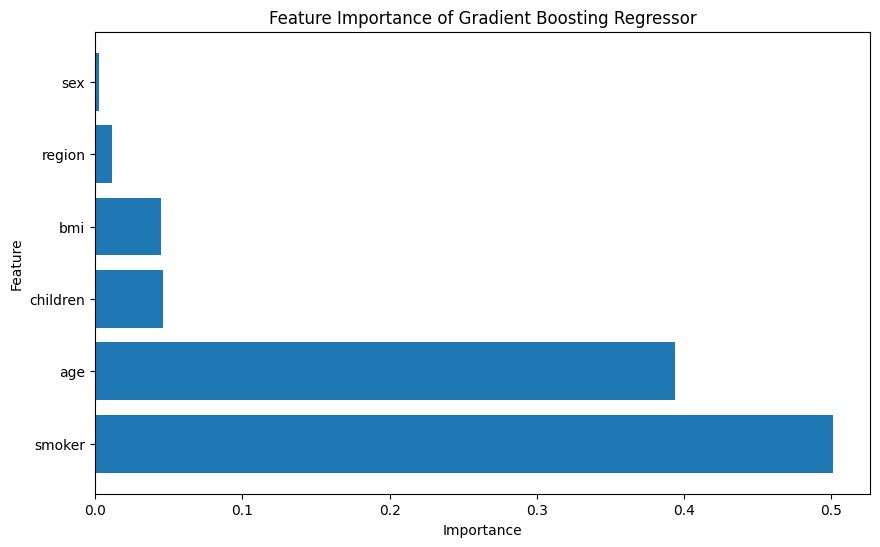

In [14]:
# feature importance from the best model

# Get feature importances from the model
feature_importances = best_gb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Gradient Boosting Regressor')
plt.show()